In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
import seaborn as sns
from skimage import io, color, exposure, filters

## Analysis Functions

In [4]:
######################################################################################################
############################################ Bounding Box ############################################
######################################################################################################
def get_bbox_areas(label_paths: list[str]):
    bbox_areas = []
    for label_path in label_paths:
        with open(label_path, "r") as f:
            for i, line in enumerate(f.readlines()):
                try:
                    c, x, y, w, h = line.split(" ")
                    w, h = float(w), float(h)
                    # print(w, h, w*h)
                    bbox_areas.append(w*h)
                except Exception as exc:
                    print(f" {i} =>> {exc}")
    return bbox_areas

def plot_bbox_areas(label_paths: list[str], dataset_name=None):
    """
    Bounding Box area analysis
    """
    dataset_name = "" if dataset_name is None else f" - {dataset_name}"
    
    bbox_areas = get_bbox_areas(label_paths)

    plt.figure(figsize=(10, 6))
    sns.histplot(bbox_areas, bins=20, kde=True, stat="percent") # binwidth=1/20
    plt.xlim(0, 1)
    plt.title(f'Distribution of Bounding Box Areas{dataset_name}')
    plt.xlabel('Bounding Box Area')
    plt.ylabel('Percentage')
    plt.show()

######################################################################################################
############################################   Samples   #############################################
######################################################################################################
def display_random_samples(image_paths, num_samples=5):
    """
    Display random samples from the dataset. Display count can be changed
    """
    sample_paths = np.random.choice(image_paths, num_samples)
    plt.figure(figsize=(15, 10))
    for i, path in enumerate(sample_paths):
        img = Image.open(path)
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

######################################################################################################
############################################ Image Dims ##############################################
######################################################################################################
def get_image_dimensions(image_paths: list[str]):
    dimensions = [Image.open(path).size for path in image_paths]
    return dimensions

def plot_image_dimensions(image_paths: list[str], dataset_name=None):
    """
    Image dimension / resolution analysis
    """
    dataset_name = "" if dataset_name is None else f" - {dataset_name}"
    
    dimensions = get_image_dimensions(image_paths)
    widths, heights = zip(*dimensions)

    # We will use DataFrames for plotting.
    widths_df = pd.DataFrame(widths, columns=['Value'])
    width_counts = widths_df['Value'].value_counts(normalize=True) * 100
    width_counts = width_counts.sort_index()

    heights_df = pd.DataFrame(heights, columns=['Value'])
    height_counts = heights_df['Value'].value_counts(normalize=True) * 100
    height_counts = height_counts.sort_index()

    combined_df = pd.DataFrame({'Width': width_counts, 'Height': height_counts})

    # Plotting the grouped bar plot
    plt.figure(figsize=(14, 8))
    combined_df.plot(kind='bar', alpha=0.5, width=0.8)
    plt.title(f'Distribution of Widths and Heights{dataset_name}')
    plt.xlabel('Resolution (Pixels)')
    plt.ylabel('Percentage')
    plt.xticks(rotation=0)
    plt.legend(title='Measurement')
    plt.grid(axis='y')
    plt.show()

def plot_image_aspect_ratios(image_paths: list[str], dataset_name=None):
    """
    Aspect ratio analysis
    """
    dataset_name = "" if dataset_name is None else f" - {dataset_name}"
    
    dimensions = get_image_dimensions(image_paths)
    aspect_ratios = [w / h for w, h in get_image_dimensions(image_paths)]
    plt.hist(aspect_ratios, bins=30)
    plt.title(f'Aspect Ratio Distribution{dataset_name}')
    plt.xlabel('Aspect Ratio (Width/Height)')
    plt.ylabel('Frequency')
    plt.show()


######################################################################################################
############################################   Colors   ##############################################
######################################################################################################
def plot_color_histogram(image: Image.Image):
    """
    Color channel analysis
    """
    image:np.ndarray = np.array(image)
    colors = ('r', 'g', 'b')
    plt.figure(figsize=(10, 4))
    for i, color in enumerate(colors):
        hist, bins = np.histogram(image[:, :, i], bins=256, range=(0, 256))
        plt.plot(hist, color=color)
    plt.xlabel('Pixel value')
    plt.ylabel('Frequency')
    plt.title('Color Histogram')
    plt.show()

def compute_brightness(image):
    image = np.array(image.convert('L'))
    return np.mean(image)

def plot_image_brightnesses(image_paths: list[str], dataset_name=None):
    """
    Brightness analysis
    """ 
    dataset_name = "" if dataset_name is None else f" - {dataset_name}"
    brightness_values = [compute_brightness(Image.open(path)) for path in image_paths]
    plt.xlim(0, 255)
    plt.hist(brightness_values, bins=25)
    plt.xlabel('Brightness')
    plt.ylabel('Frequency')
    plt.title(f'Brightness Distribution{dataset_name}')
    plt.show()


## Simulation Dataset

In [6]:
DATASET_NAME = "Simulation Dataset"
image_dir = 'uav_dataset_sim/train/images'
label_dir = 'uav_dataset_sim/train/labels'

image_paths = glob(os.path.join(image_dir, '*.png'))
label_paths = glob(os.path.join(label_dir, '*.txt'))

train_set_size = len(label_paths)
valid_set_size = len(glob(os.path.join(f"{label_dir}/../../valid/labels/*.txt")))
test_set_size  = len(glob(os.path.join(f"{label_dir}/../../test/labels/*.txt" )))
total_size = train_set_size + valid_set_size + test_set_size

print(f"[{DATASET_NAME}] train set size: {train_set_size}")
print(f"[{DATASET_NAME}] train set size: {valid_set_size}")
print(f"[{DATASET_NAME}] train set size: {test_set_size}")
print(f"[{DATASET_NAME}] dataset size: {total_size}")

[Simulation Dataset] train set size: 613
[Simulation Dataset] train set size: 76
[Simulation Dataset] train set size: 76
[Simulation Dataset] dataset size: 765


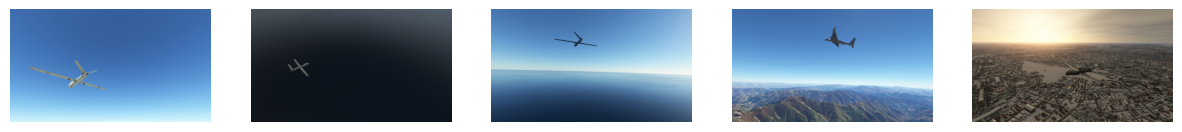

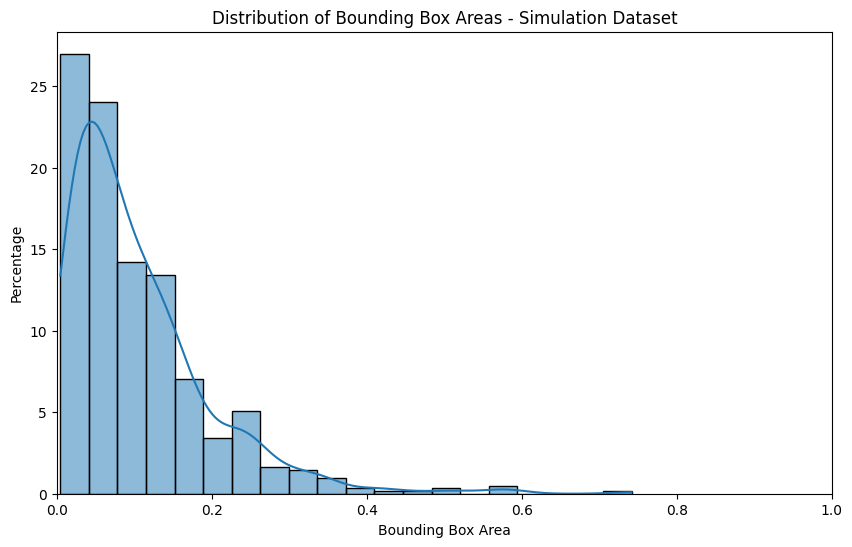

<Figure size 1400x800 with 0 Axes>

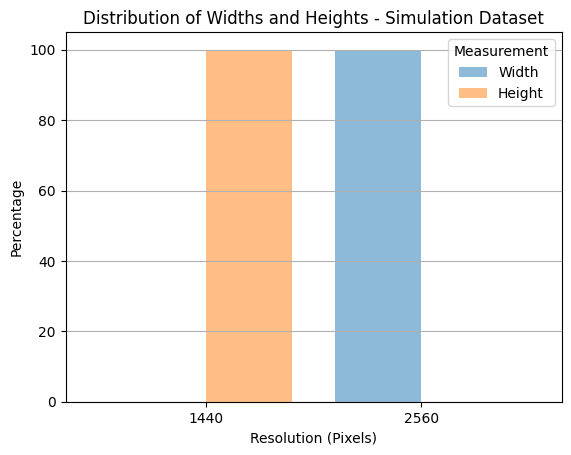

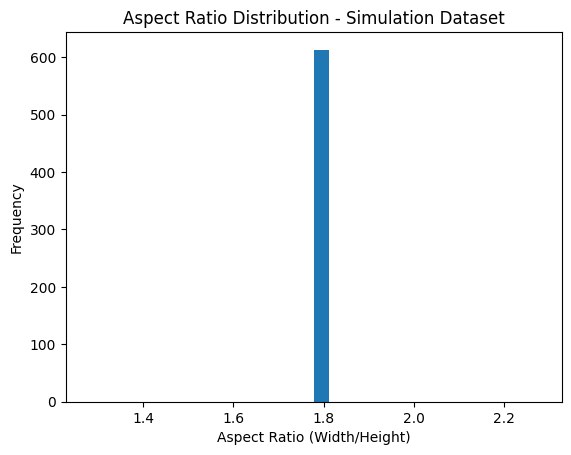

Color histograms from random samples:


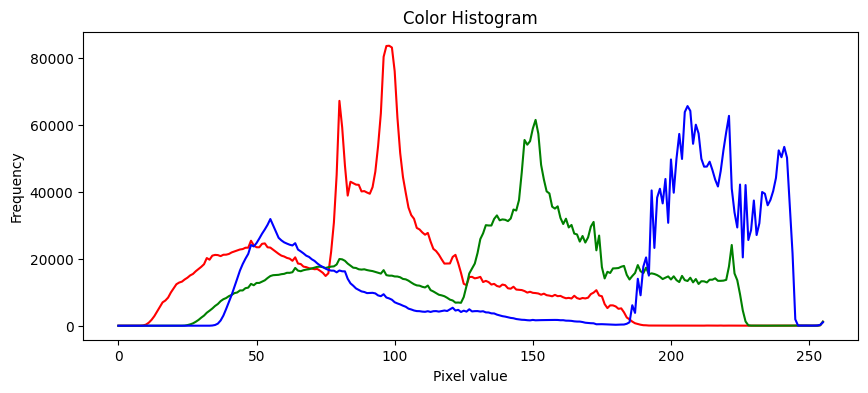

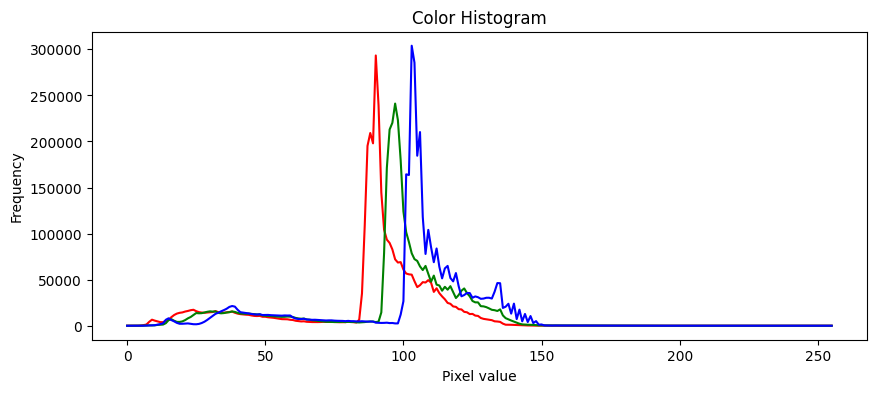

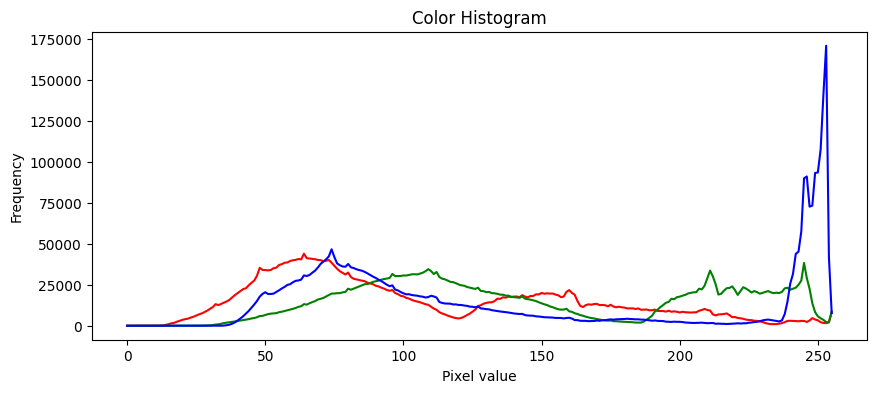

In [125]:
display_random_samples(image_paths)
plot_bbox_areas(label_paths, DATASET_NAME)

plot_image_dimensions(image_paths, DATASET_NAME)
plot_image_aspect_ratios(image_paths, DATASET_NAME)

print("Color histograms from random samples:")
sample_paths = np.random.choice(image_paths, 3)
for path in sample_paths:
    img = Image.open(path)
    plot_color_histogram(img)


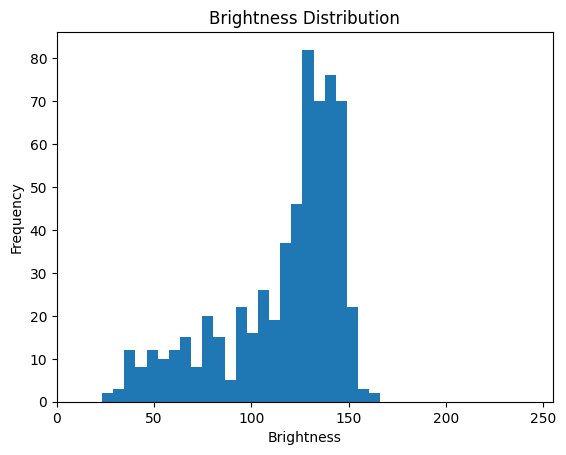

In [7]:
plot_image_brightnesses(image_paths)

## Public (Online) Dataset

In [9]:
DATASET_NAME = "Public Dataset"
image_dir = 'uav_dataset_public/train/images'
label_dir = 'uav_dataset_public/train/labels'

image_paths = glob(os.path.join(image_dir, '*.jpg'))
label_paths = glob(os.path.join(label_dir, '*.txt'))

train_set_size = len(label_paths)
valid_set_size = len(glob(os.path.join(f"{label_dir}/../../valid/labels/*.txt")))
test_set_size  = len(glob(os.path.join(f"{label_dir}/../../test/labels/*.txt" )))
total_size = train_set_size + valid_set_size + test_set_size

print(f"[{DATASET_NAME}] train set size: {train_set_size}")
print(f"[{DATASET_NAME}] train set size: {valid_set_size}")
print(f"[{DATASET_NAME}] train set size: {test_set_size}")
print(f"[{DATASET_NAME}] dataset size: {total_size}")

[Public Dataset] train set size: 341
[Public Dataset] train set size: 42
[Public Dataset] train set size: 42
[Public Dataset] dataset size: 425


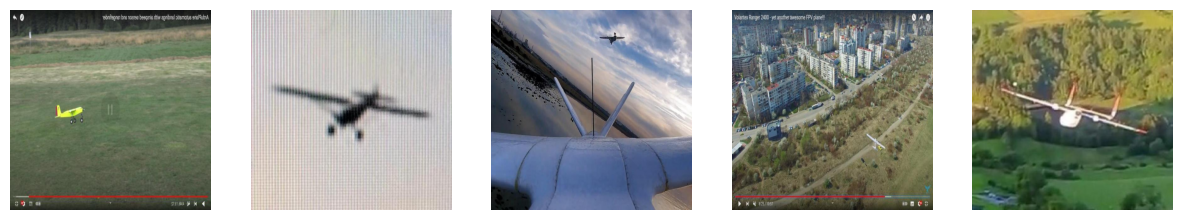

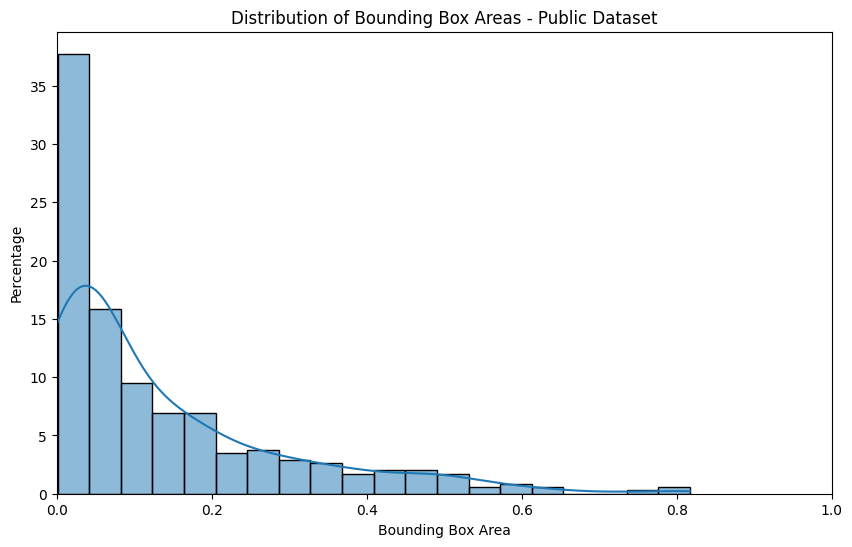

<Figure size 1400x800 with 0 Axes>

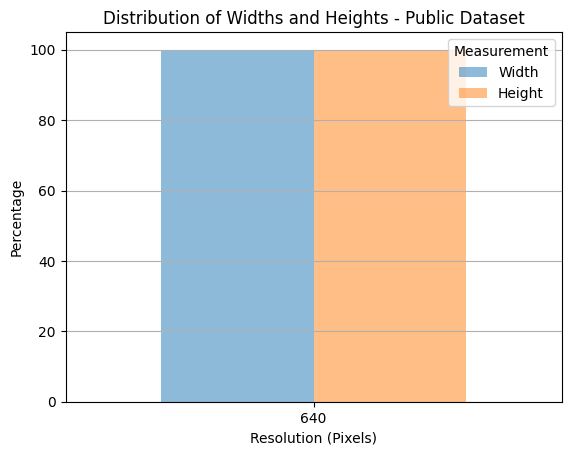

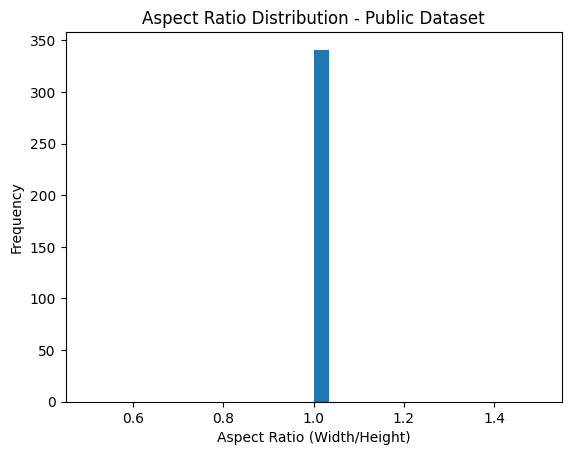

Color histograms from random samples:


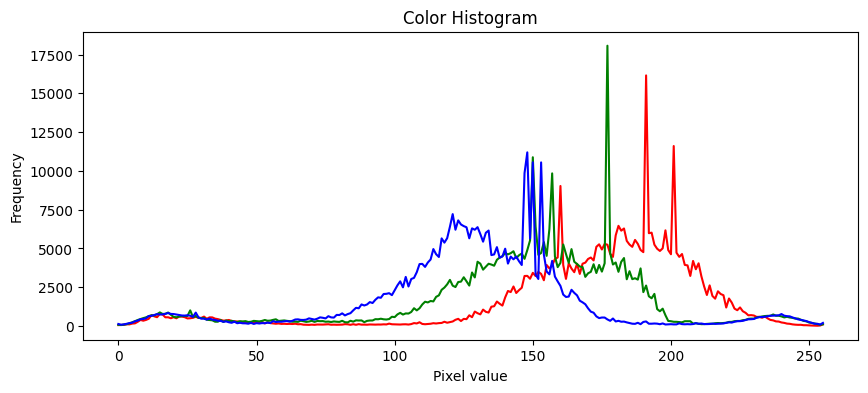

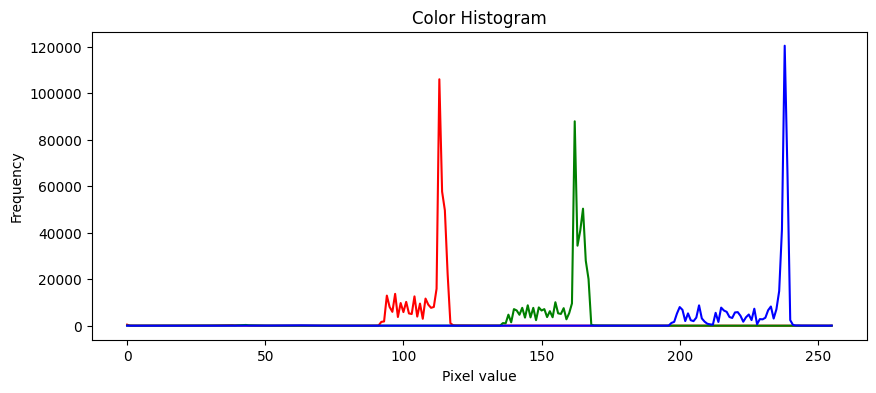

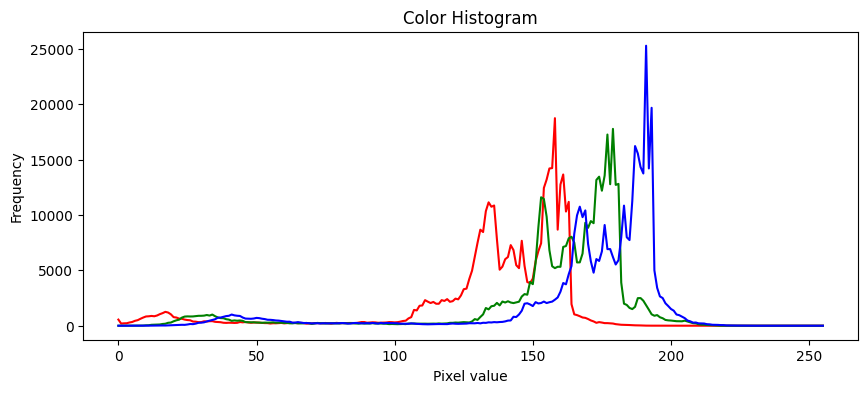

In [131]:
display_random_samples(image_paths)
plot_bbox_areas(label_paths, DATASET_NAME)

plot_image_dimensions(image_paths, DATASET_NAME)
plot_image_aspect_ratios(image_paths, DATASET_NAME)

print("Color histograms from random samples:")
sample_paths = np.random.choice(image_paths, 3)
for path in sample_paths:
    img = Image.open(path)
    plot_color_histogram(img)


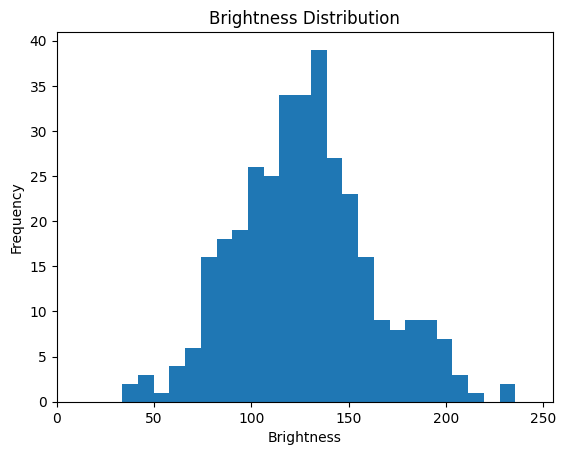

In [10]:
plot_image_brightnesses(image_paths)

## Test Dataset - Real Life UAV Flight

In [11]:
DATASET_NAME = "Real Test Dataset"
image_dir = 'uav_dataset_gokboru/test_all/images'
label_dir = 'uav_dataset_gokboru/test_all/labels'

image_paths = glob(os.path.join(image_dir, '*.png'))
label_paths = glob(os.path.join(label_dir, '*.txt'))

total_size = len(label_paths)

print(f"[{DATASET_NAME}] dataset size: {total_size}")

[Real Test Dataset] dataset size: 132


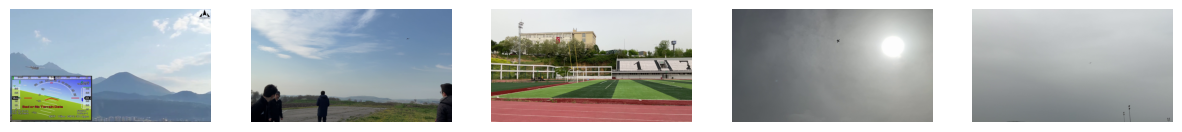

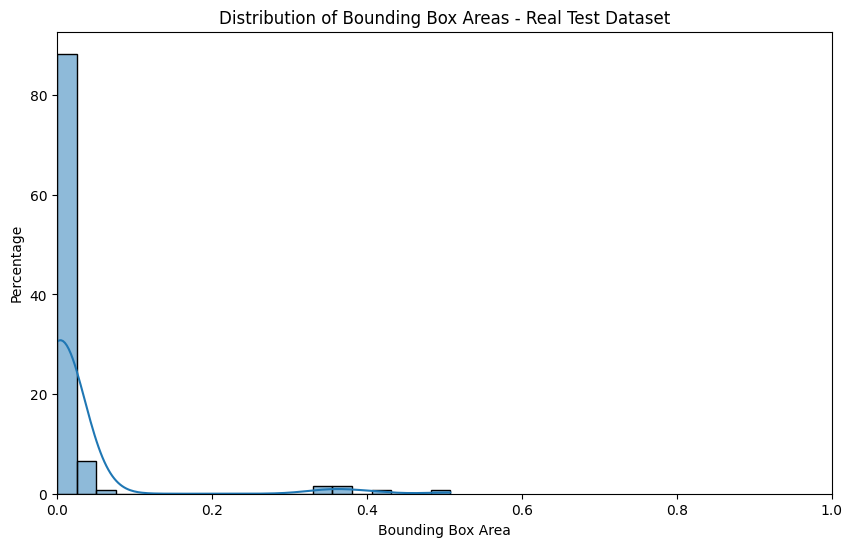

<Figure size 1400x800 with 0 Axes>

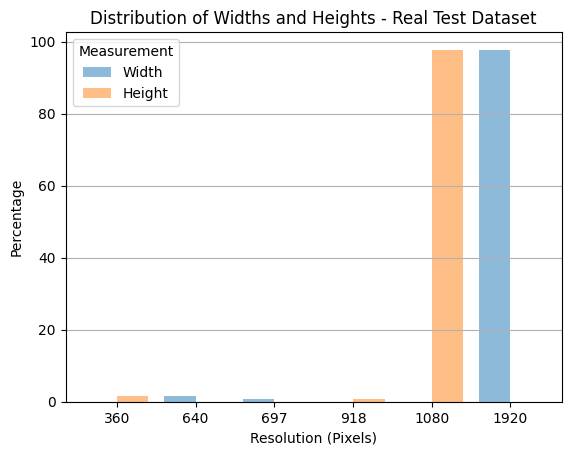

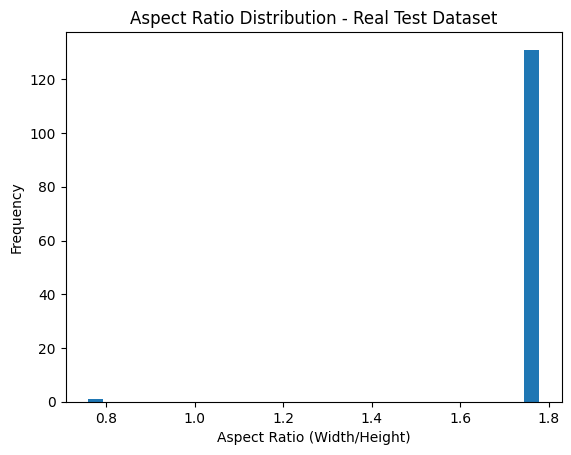

Color histograms from random samples:


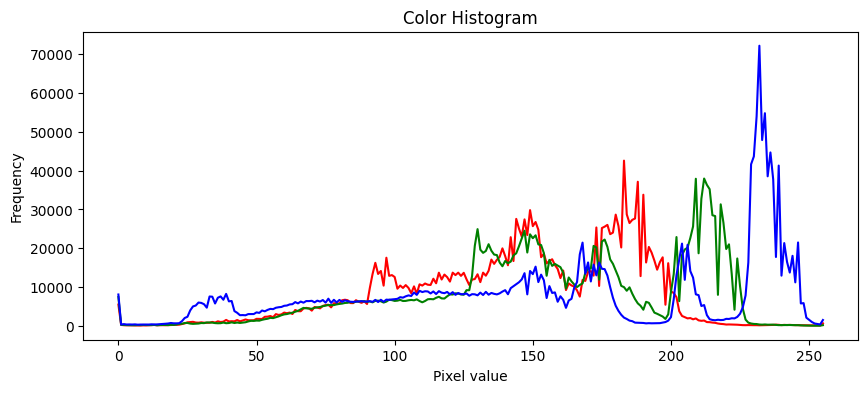

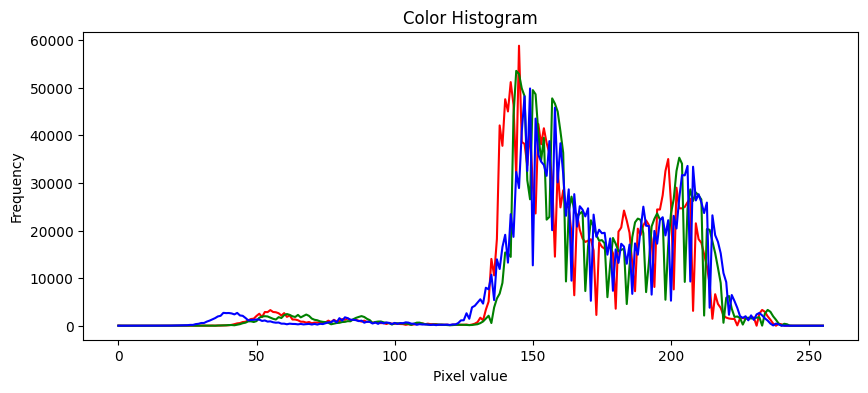

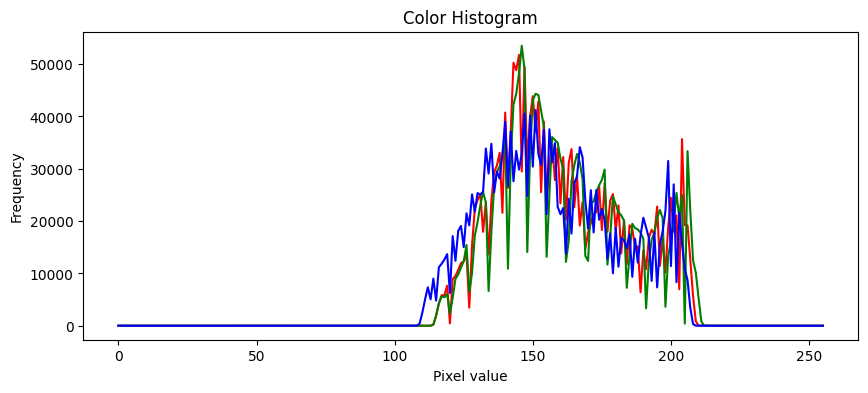

In [120]:
display_random_samples(image_paths)
plot_bbox_areas(label_paths, DATASET_NAME)

plot_image_dimensions(image_paths, DATASET_NAME)
plot_image_aspect_ratios(image_paths, DATASET_NAME)

print("Color histograms from random samples:")
sample_paths = np.random.choice(image_paths, 3)
for path in sample_paths:
    img = Image.open(path)
    plot_color_histogram(img)


In [12]:
plot_image_brightnesses(image_paths)